# Template of a SMI jupyter notebook

In [2]:
# These packages should all be installed if the procedure was followed
%pylab nbagg

import matplotlib.pyplot as plt

from smi_analysis import SMI_beamline
import numpy as np
import fabio
import os

Populating the interactive namespace from numpy and matplotlib


## Experimental configuration

In [3]:
geometry = 'Reflection'
energy = 14.0
wav = 1E-10 * (12.398/energy)
bs_kind = None
det_ini_angle = np.deg2rad(0)
det_angle_step = np.deg2rad(6.5)
incident_angle = np.deg2rad(0)

#WAXS
detector_waxs = 'Pilatus900kw'
sdd_waxs = 279.5
center_waxs = [97., 1256]
bs_pos_waxs = [[12, 1070]]

SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                     detector = detector_waxs,
                                     sdd = sdd_waxs,
                                     wav = wav,
                                     alphai = incident_angle,
                                     center = center_waxs,
                                     bs_pos = bs_pos_waxs,
                                     det_ini_angle = det_ini_angle,
                                     det_angle_step = det_angle_step,
                                     bs_kind = bs_kind)

## Locate the files on your computer

In [7]:
CYCLE='2021_3'
proposal_id =  '309180_Chaney'

path = '/home/etortoric/Documents/TeddyT/raw_data/900KW'

for file in os.listdir(path):
#     if 'AgBh' in file:
        print(file)

TC_TT3_14keV_ai0.11deg_wa10.6_000001_WAXS.tif
TC_TT1_14keV_ai0.11deg_wa10.6_000001_WAXS.tif
TC_TT1_14keV_ai0.14deg_wa10.6_000001_WAXS.tif
TC_TT3_14keV_ai0.14deg_wa10.6_000001_WAXS.tif


In [8]:
#waxs
path = '/home/etortoric/Documents/TeddyT/raw_data/900KW'
ResDir = '/home/etortoric/Documents/TeddyT/output/'

sam = []
for file in os.listdir(path):
     if 'wa10.6' in file:
        idx = file.find('wa10.6')
        idx1 = file.find('.tif')

        sam = sam + [file[:idx]]

print(sam)

all_dat = [[]] * len(sam)
all_da = [[]] * len(sam)
    
for j, sa in enumerate(sam):   
    for file in sorted(os.listdir(path)):
        if sa in file and 'tif' in file and '000001' in file:
            all_dat[j] = all_dat[j] + [file]
            
print(all_dat[0])
            
for i, all_d in enumerate(all_dat):
    for wa in ['wa10.6', 'wa30.5']:
        for dat in all_d:
            if wa in dat:
                all_da[i] = all_da[i] + [dat]
 
print(all_da[0])


['TC_TT3_14keV_ai0.11deg_', 'TC_TT1_14keV_ai0.11deg_', 'TC_TT1_14keV_ai0.14deg_', 'TC_TT3_14keV_ai0.14deg_']
['TC_TT3_14keV_ai0.11deg_wa10.6_000001_WAXS.tif']
['TC_TT3_14keV_ai0.11deg_wa10.6_000001_WAXS.tif']


## Data stitching and reduction (all this part is done using SMI_beamline package)

10.6


<IPython.core.display.Javascript object>


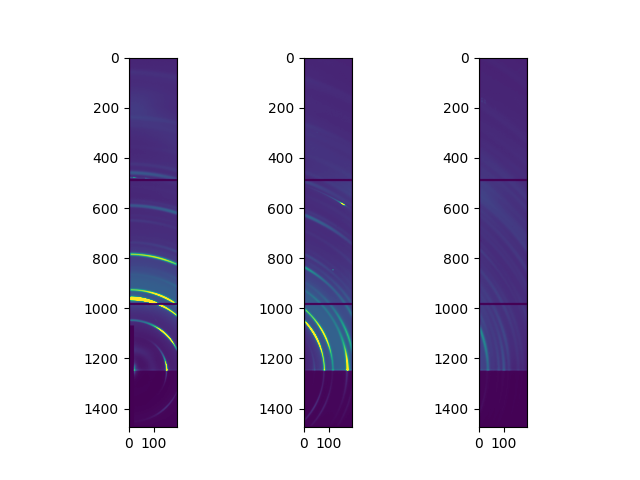

<IPython.core.display.Javascript object>


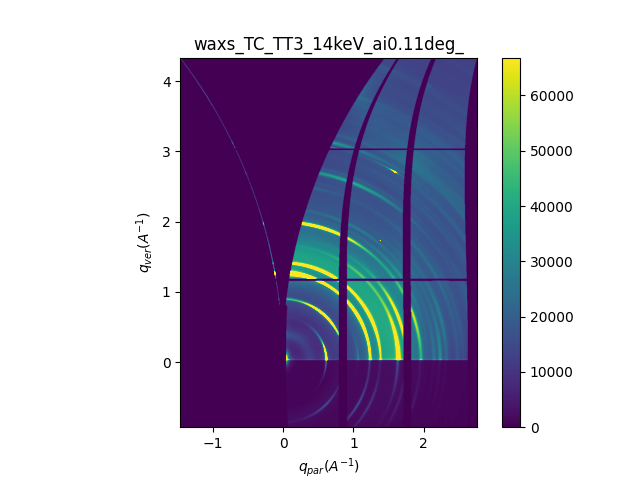

<IPython.core.display.Javascript object>


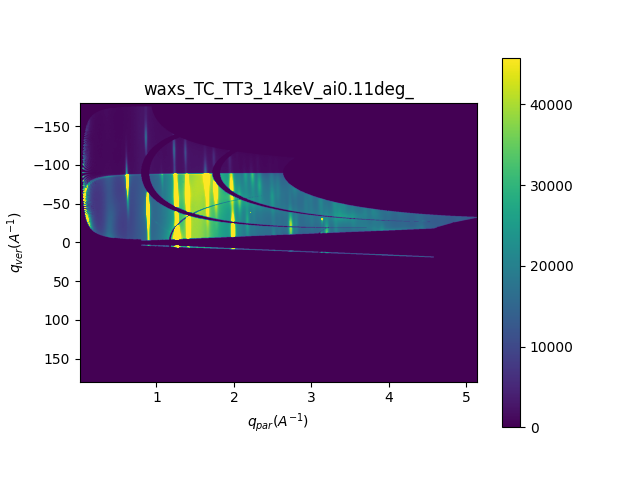

<IPython.core.display.Javascript object>


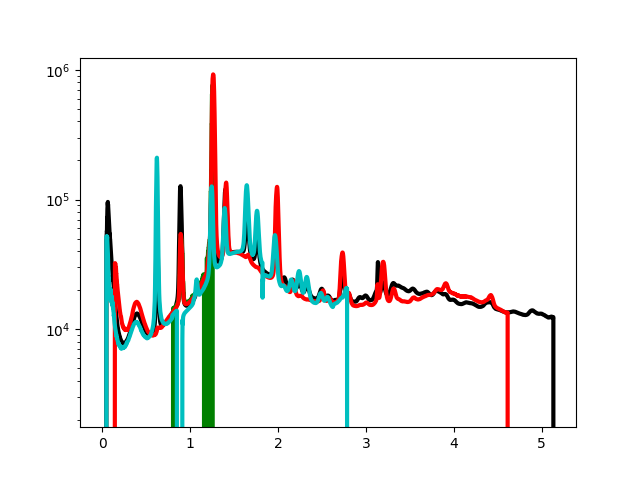

Done


In [9]:
from smi_analysis.Detector import VerticalPilatus900kw

#waxs
flag_save = True
path = '/home/etortoric/Documents/TeddyT/raw_data/900KW'
ResDir = '/home/etortoric/Documents/TeddyT/output/'
for j, dat in enumerate([all_da[0]]):
        idx = dat[0].find('ai')
        idx1 = dat[0].find('deg')
        alphai = np.deg2rad(float(dat[0][idx+2:idx1]))
        
        idx2 = dat[0].find('_wa')
        idx3 = dat[0].find('_000001')

        waxs_angle = []
        for da in dat:
            waxs_angle = waxs_angle + [np.deg2rad(float(da[idx2+3:idx3]))]
        print(dat[0][idx2+3:idx3])

        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = 'Pilatus900kw',
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = alphai,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = waxs_angle,
                                             bs_kind = None)

        SMI_waxs.open_data(path, dat)
        print(SMI_waxs)
        masks = [SMI_waxs.masks[1]] + [SMI_waxs.masks[0]] + [SMI_waxs.masks[2]]
        SMI_waxs.masks = masks
        plt.figure()
        for i, (img, mask) in enumerate(zip(SMI_waxs.imgs, SMI_waxs.masks)):
            SMI_waxs.imgs[i] *= 10
            plt.subplot(1, len(SMI_waxs.imgs), i+1)
            plt.imshow(img * np.logical_not(mask), vmin = 0, vmax =np.percentile(SMI_waxs.imgs[0], 99))
        plt.show()

        SMI_waxs.stitching_data(interp_factor=3)

        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        SMI_waxs.caking()
        plt.figure()
        plt.imshow(SMI_waxs.cake,
                   extent=[SMI_waxs.q_cake[0], SMI_waxs.q_cake[-1], SMI_waxs.chi_cake[0], SMI_waxs.chi_cake[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.cake, 99),
                   aspect=0.01)    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()


        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[0, 90], npt = 5000)
        q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-5, 0], npt = 5000)
        q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[0, 20], npt = 5000)
        q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-90, -85], npt=5000)
        q3, I3 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[70, 90], npt=5000)
        q4, I4 = SMI_waxs.q_rad, SMI_waxs.I_rad

        plt.figure()
        plt.plot(q0, I0, linewidth = 3, color = 'k')
        plt.plot(q1, I1, linewidth = 3, color = 'g')
        plt.plot(q2, I2, linewidth = 3, color = 'r')
        plt.plot(q3, I3, linewidth = 3, color = 'b')
        plt.plot(q4, I4, linewidth = 3, color = 'c')

        plt.yscale('log')
        plt.show()

print('Done')

10.6


<IPython.core.display.Javascript object>


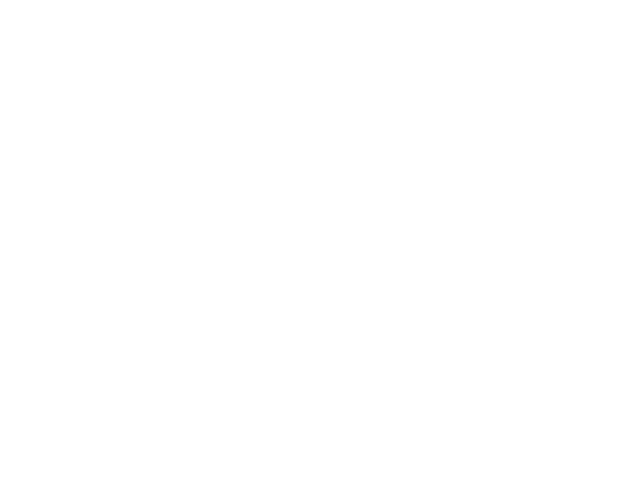

10.6


<IPython.core.display.Javascript object>


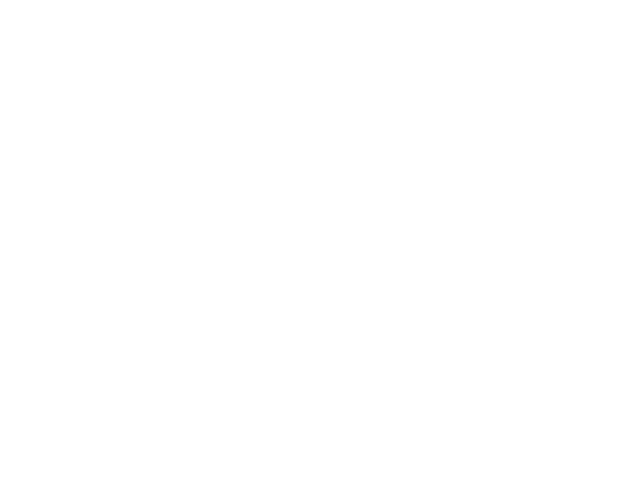

10.6


<IPython.core.display.Javascript object>


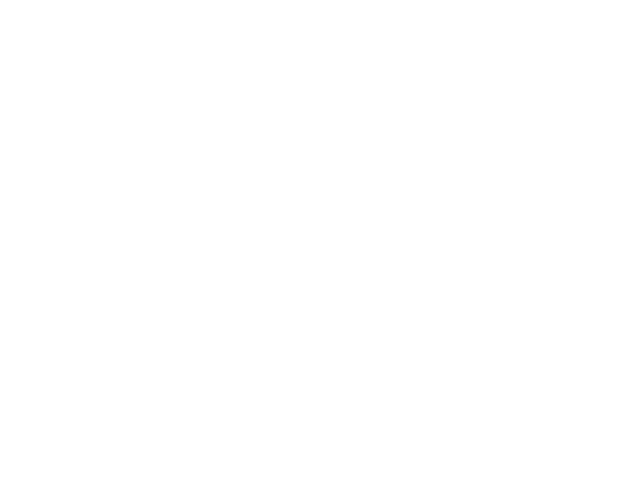

10.6


<IPython.core.display.Javascript object>


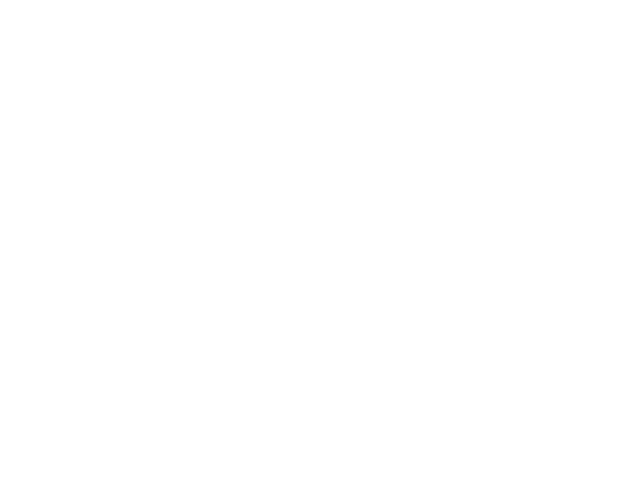

Done


In [10]:

#waxs
flag_save = True
path = '/home/etortoric/Documents/TeddyT/raw_data/900KW'
ResDir = '/home/etortoric/Documents/TeddyT/output'

for j, dat in enumerate(all_da):
        idx = dat[0].find('ai')
        idx1 = dat[0].find('deg')
        alphai = np.deg2rad(float(dat[0][idx+2:idx1]))
        
        idx2 = dat[0].find('_wa')
        idx3 = dat[0].find('_000001')

        waxs_angle = []
        for da in dat:
            waxs_angle = waxs_angle + [np.deg2rad(float(da[idx2+3:idx3]))]
        print(dat[0][idx2+3:idx3])
        

        #This part is to stitch the data
        SMI_waxs = SMI_beamline.SMI_geometry(geometry = geometry,
                                             detector = 'Pilatus900kw',
                                             sdd = sdd_waxs,
                                             wav = wav,
                                             alphai = alphai,
                                             center = center_waxs,
                                             bs_pos = bs_pos_waxs,
                                             det_angles = waxs_angle,
                                             bs_kind = None)

        SMI_waxs.open_data(path, dat)
        masks = [SMI_waxs.masks[1]] + [SMI_waxs.masks[0]] + [SMI_waxs.masks[2]]
        SMI_waxs.masks = masks
        
        SMI_waxs.stitching_data(interp_factor=3)

        plt.figure()
        plt.imshow(SMI_waxs.img_st,
                   extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]], 
                   vmin=0,
                   vmax=np.percentile(SMI_waxs.img_st, 99))    
        plt.title('waxs_%s'%sam[j])
        plt.xlabel('$q_{par}(A^{-1})$')
        plt.ylabel('$q_{ver}(A^{-1})$')
        plt.colorbar()
        plt.show()

        SMI_waxs.caking()

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[0, 90], npt = 5000)
        q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-5, 0], npt = 5000)
        q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[0, 10], npt = 5000)
        q2, I2 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[-90, -85], npt=5000)
        q3, I3 = SMI_waxs.q_rad, SMI_waxs.I_rad

        SMI_waxs.radial_averaging(radial_range = [0, 8], azimuth_range=[80, 90], npt=5000)
        q4, I4 = SMI_waxs.q_rad, SMI_waxs.I_rad


        if flag_save:
            #Save the plot as a png
            plt.savefig(os.path.join(ResDir, 'q_map_waxs_%s.png'%sam[j]))

            #Save the qx and qy as an 1D array
            np.savetxt(os.path.join(ResDir, 'qpar_waxs_%s.txt'%sam[j]), np.linspace(SMI_waxs.qp[0], SMI_waxs.qp[1], np.shape(SMI_waxs.img_st)[1]))
            np.savetxt(os.path.join(ResDir, 'qver_waxs_%s.txt'%sam[j]), np.linspace(SMI_waxs.qz[0], SMI_waxs.qz[1], np.shape(SMI_waxs.img_st)[0])) 

            #Save the stitched image as a tiff
            fabio.tifimage.TifImage(np.nan_to_num(SMI_waxs.img_st).astype('int')).write(os.path.join(ResDir, 'q_map_waxs_%s.tiff'%sam[j])) 

            #Save the sum image as a tiff
            np.savetxt(os.path.join(ResDir, 'Radint_0-90deg_waxs_%s.txt'%sam[j]), np.vstack((q0, I0)).T)
            np.savetxt(os.path.join(ResDir, 'Radint_0-10deg_waxs_%s.txt'%sam[j]), np.vstack((q2, I2)).T)
            np.savetxt(os.path.join(ResDir, 'Radint_80-90deg_waxs_%s.txt'%sam[j]), np.vstack((q4, I4)).T)

        plt.close() 
print('Done')